In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [6]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:

housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Correlation in Numeric Data

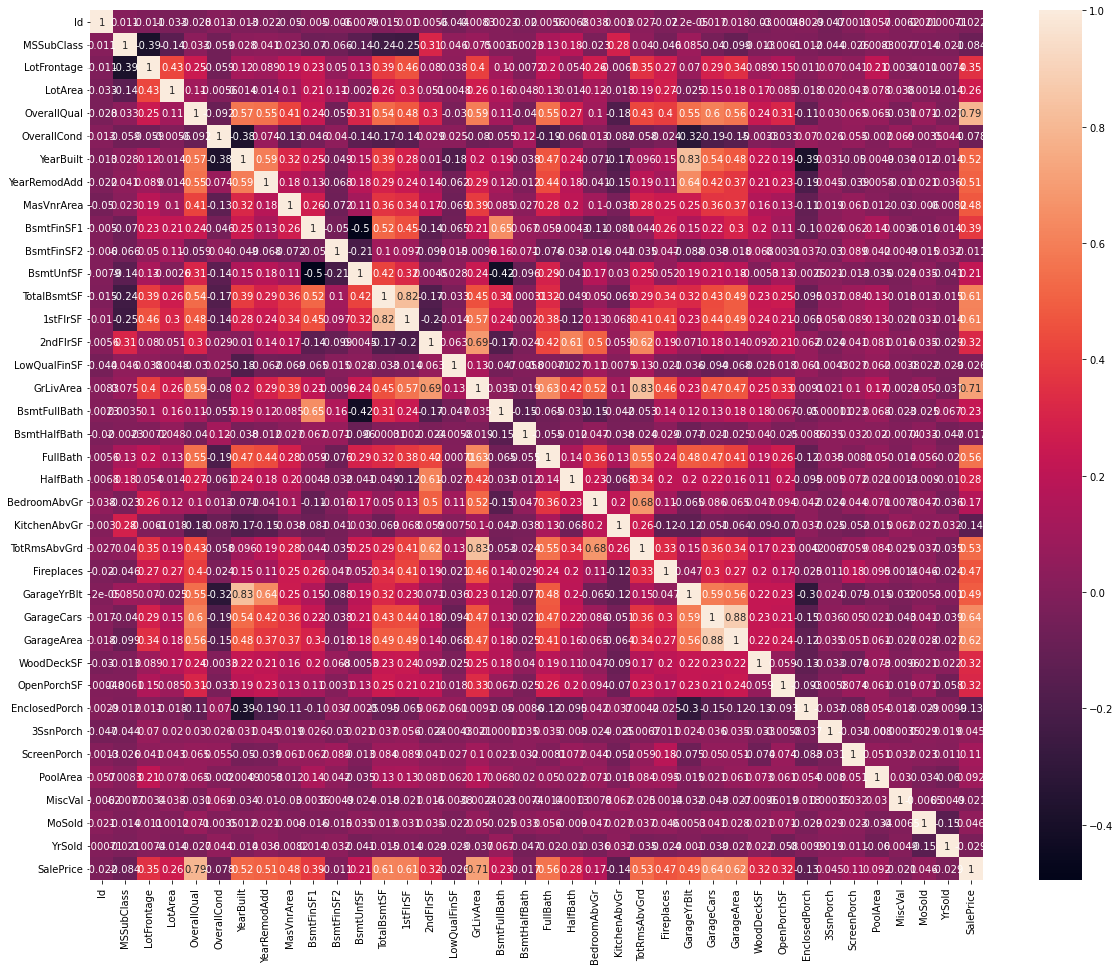

In [8]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

The datasets have few features which are highly correlated with each other

- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

Therefore, One feature from each of these pair will be dropped.

In [9]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

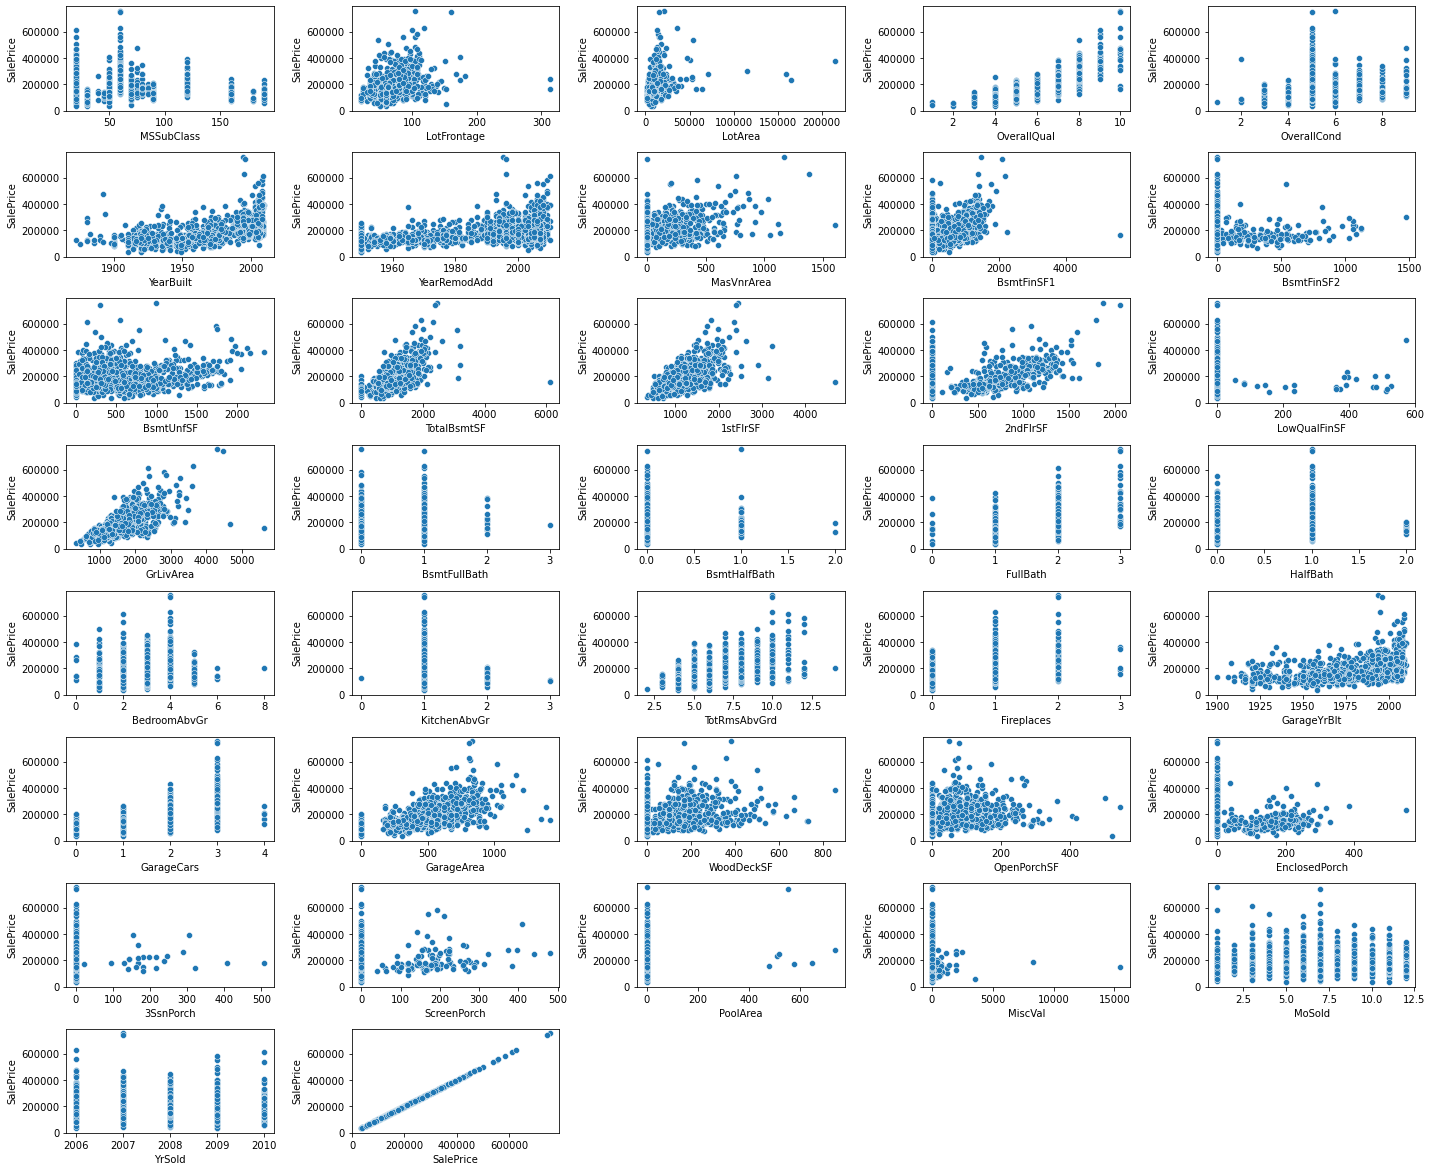

In [10]:
fig=plt.subplots(figsize=(20, 20))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']):
    plt.subplot(10, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

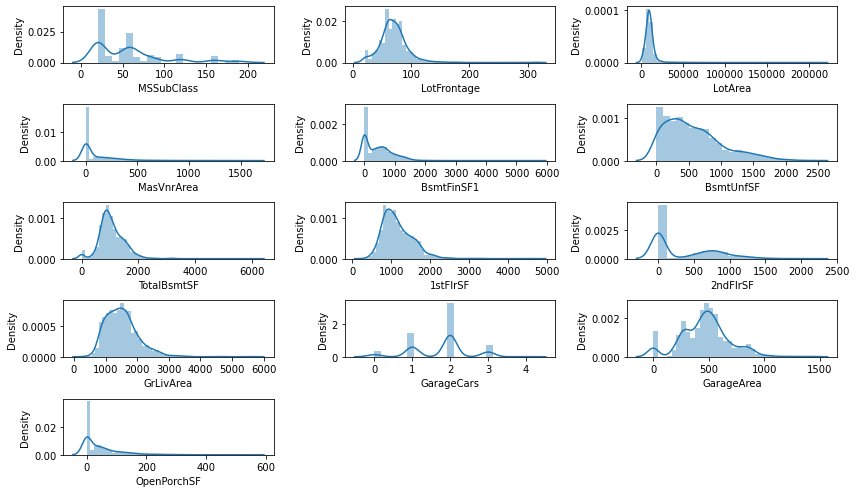

In [11]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [12]:
housing_df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()


,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,1515.463699,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,48.623081,525.480383,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1129.500000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1464.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1776.750000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,572.000000,5642.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [13]:
housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,21.954110,3.409589,15.060959,2.758904,43.489041
std,48.623081,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,572.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [14]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

In [15]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5,2,2008,1,0,2,1,3,1,8,0,2003.0,2003,2003
1,6,8,5,2007,0,1,2,0,3,1,6,1,1976.0,1976,1976
2,7,5,9,2008,1,0,2,1,3,1,6,1,2001.0,2001,2002
3,7,5,2,2006,1,0,1,0,3,1,7,1,1998.0,1915,1970
4,8,5,12,2008,1,0,2,1,4,1,9,1,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,8,2007,0,0,2,1,3,1,7,1,1999.0,1999,2000
1456,6,6,2,2010,1,0,2,0,3,1,7,2,1978.0,1978,1988
1457,7,9,5,2010,0,0,2,0,4,1,9,2,1941.0,1941,2006
1458,5,6,4,2010,1,0,1,0,2,1,5,0,1950.0,1950,1996


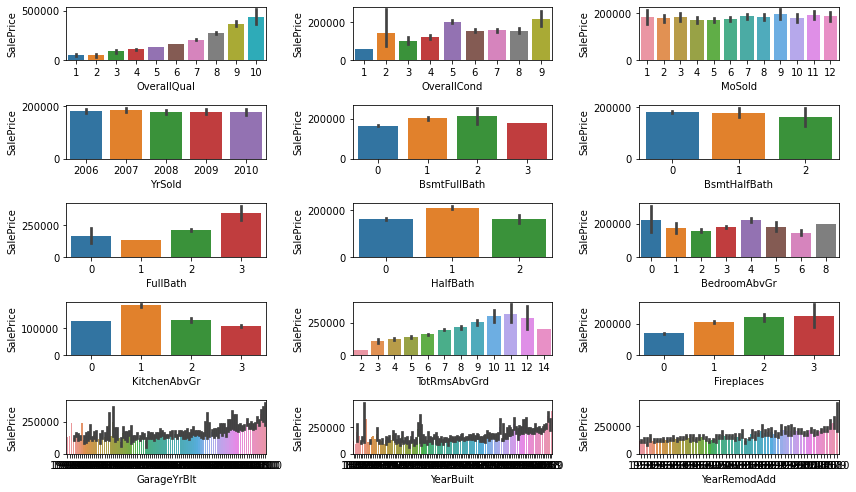

In [16]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

- 'OverallQual' : Sale price increased with the iincreament of the feature. 

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice 

- 'TotRmsAbvGrd' : number of rooms increase the sale price 


In [17]:
housing_df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000
mean,0.425342,1.046575,1978.506164,1971.267808,1984.865753
std,0.518911,0.220338,24.689725,30.202904,20.645407
min,0.000000,0.000000,1900.000000,1872.000000,1950.000000
25%,0.000000,1.000000,1961.000000,1954.000000,1967.000000
50%,0.000000,1.000000,1980.000000,1973.000000,1994.000000
75%,1.000000,1.000000,2002.000000,2000.000000,2004.000000
max,3.000000,3.000000,2010.000000,2010.000000,2010.000000


In [18]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [19]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [20]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.267808,1984.865753,2007.815753
std,24.689725,30.202904,20.645407,1.328095
min,1900.000000,1872.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [21]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

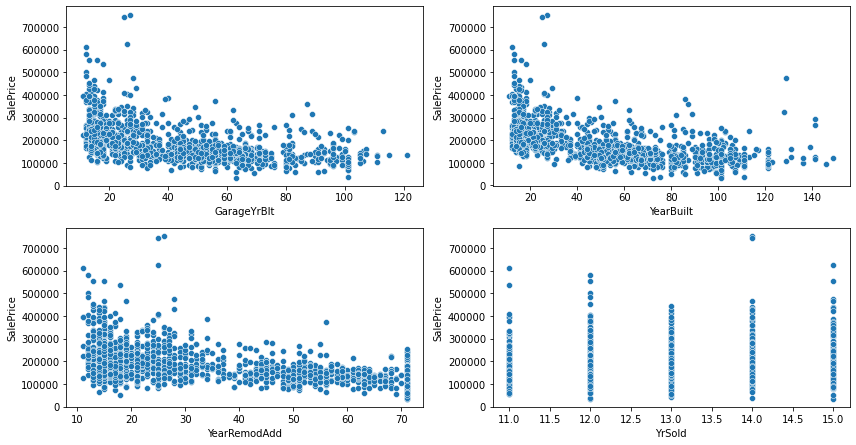

In [22]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

- YrSold is not showing any significant trend

In [23]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [24]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [25]:
# Checking the number of remaining columns
housing_df.columns.shape

(73,)

### Dropping features

In [26]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True) # heighly correlated

# Checking the number of remaining columns
print(housing_df.columns.shape)

(69,)


### Analyzing Categorical Features

In [27]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
print("Feature : Percentage of Missing Value")   #missing value in categorical data
print("=====================================")
for feat in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [29]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [30]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [31]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data 
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [32]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


In [33]:
housing_df.columns.shape

(68,)

#### Encoding for categorical data

In [34]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(30, 30))
    for i, feature in enumerate(feature_list):
        plt.subplot(15, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_df['SalePrice'], housing_df[feature])
        plt.tight_layout()

In [35]:
ordered_features=['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir']

unordered_features=['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

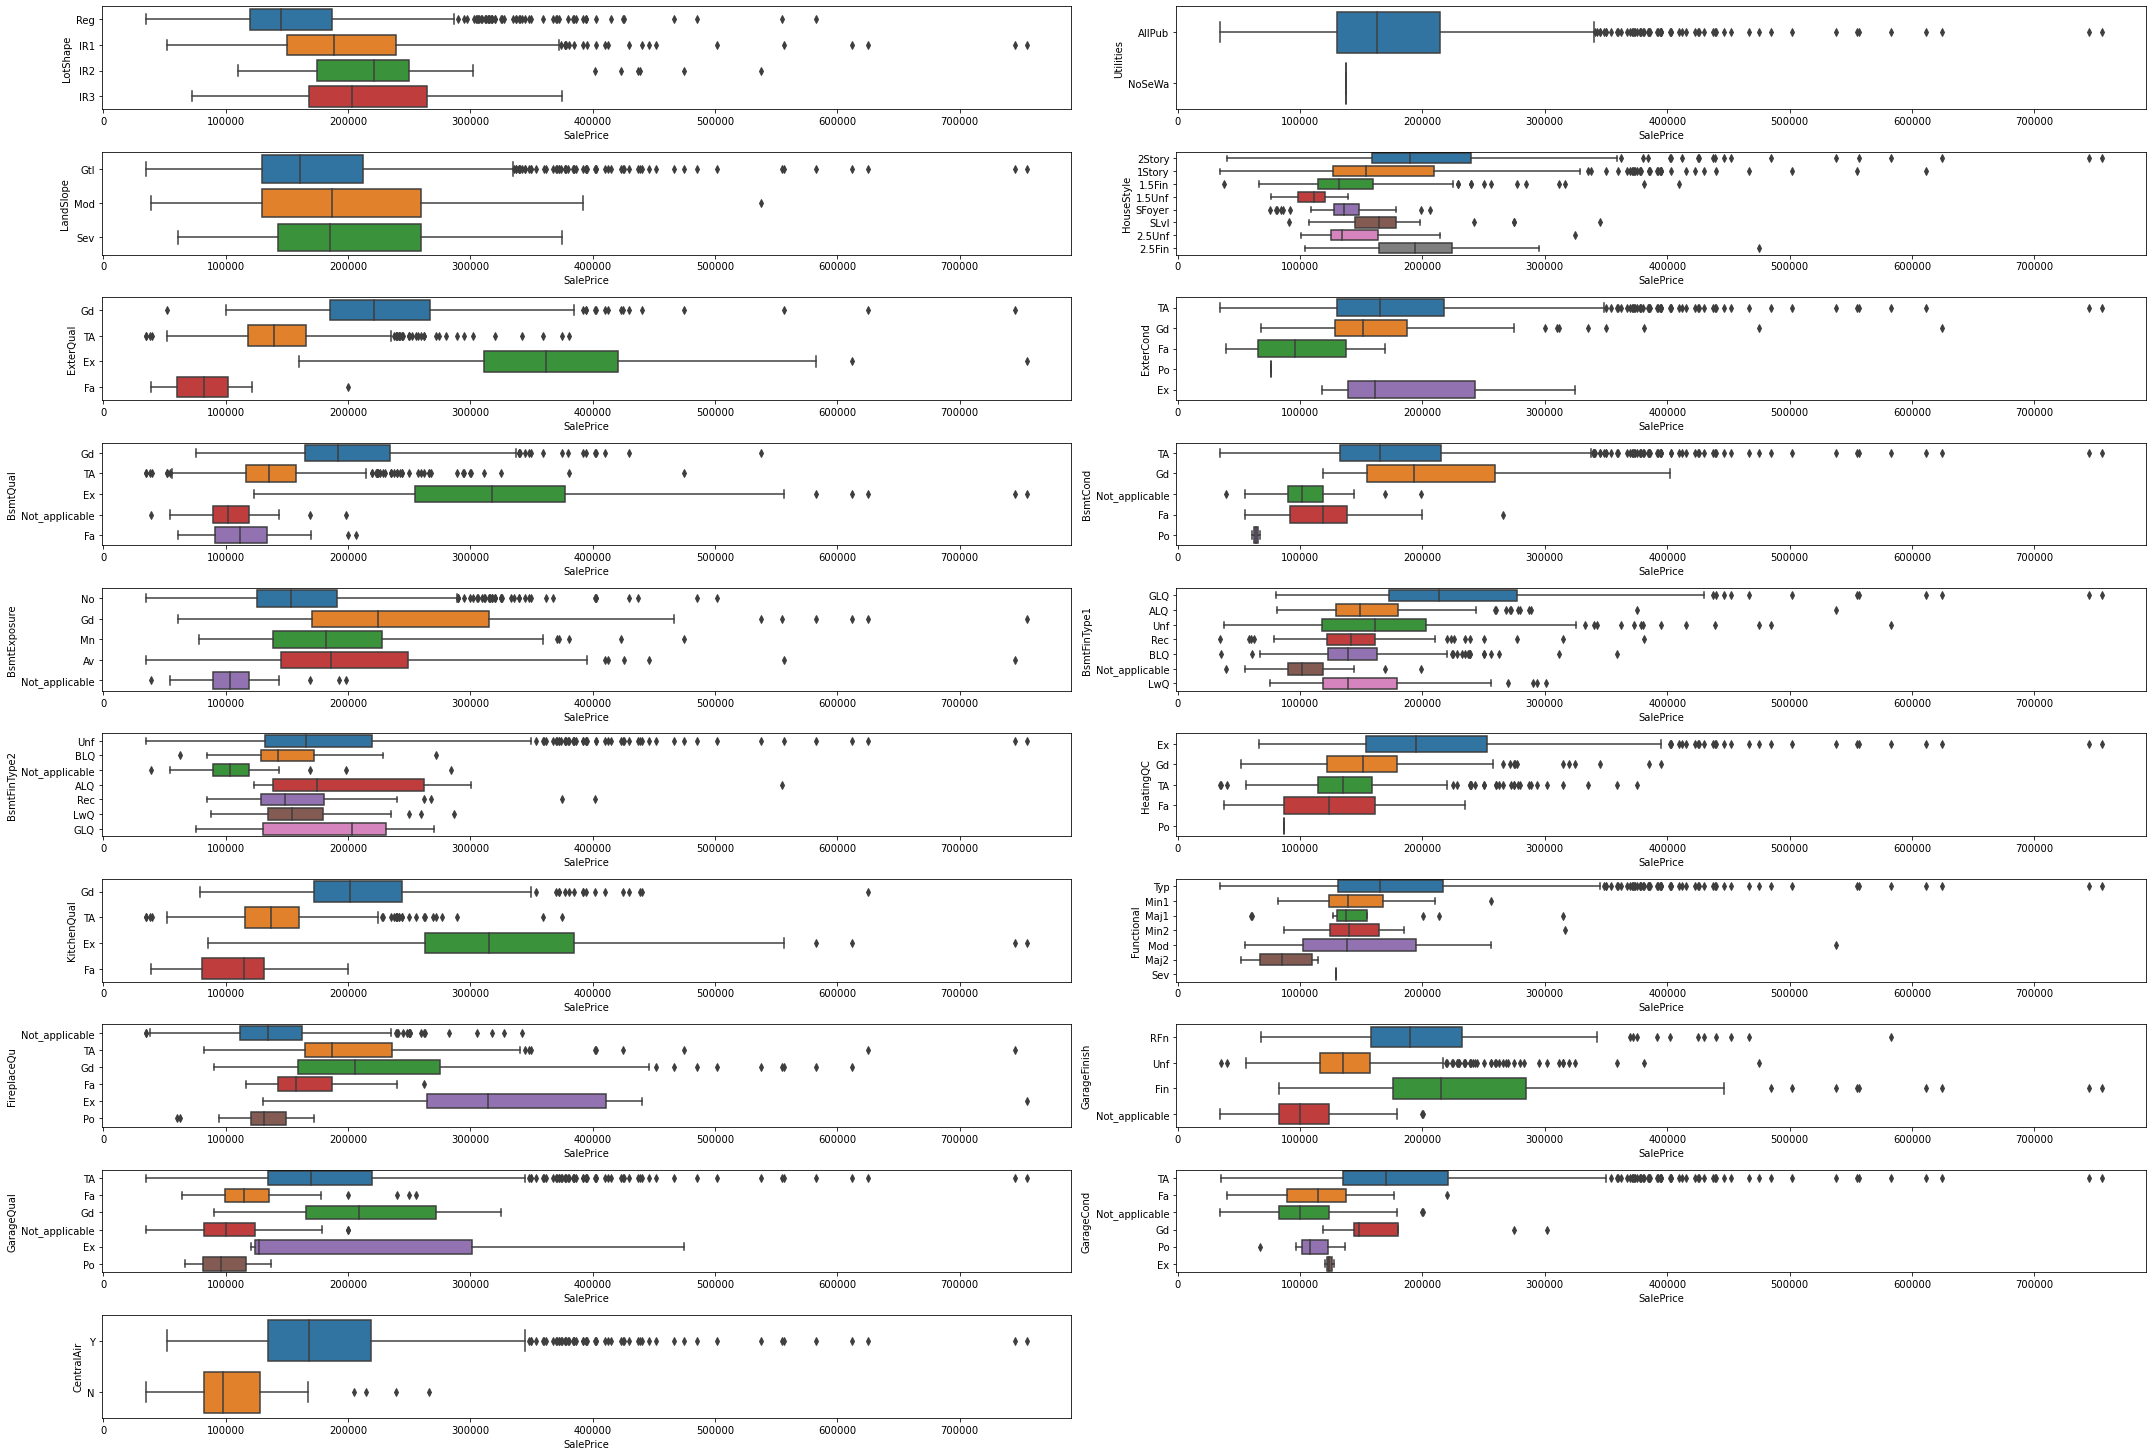

In [36]:
generate_boxplot(ordered_features)

#### Encoding

In [37]:

housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [38]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 247.7 KB


#### Analyzing Unordered Featues

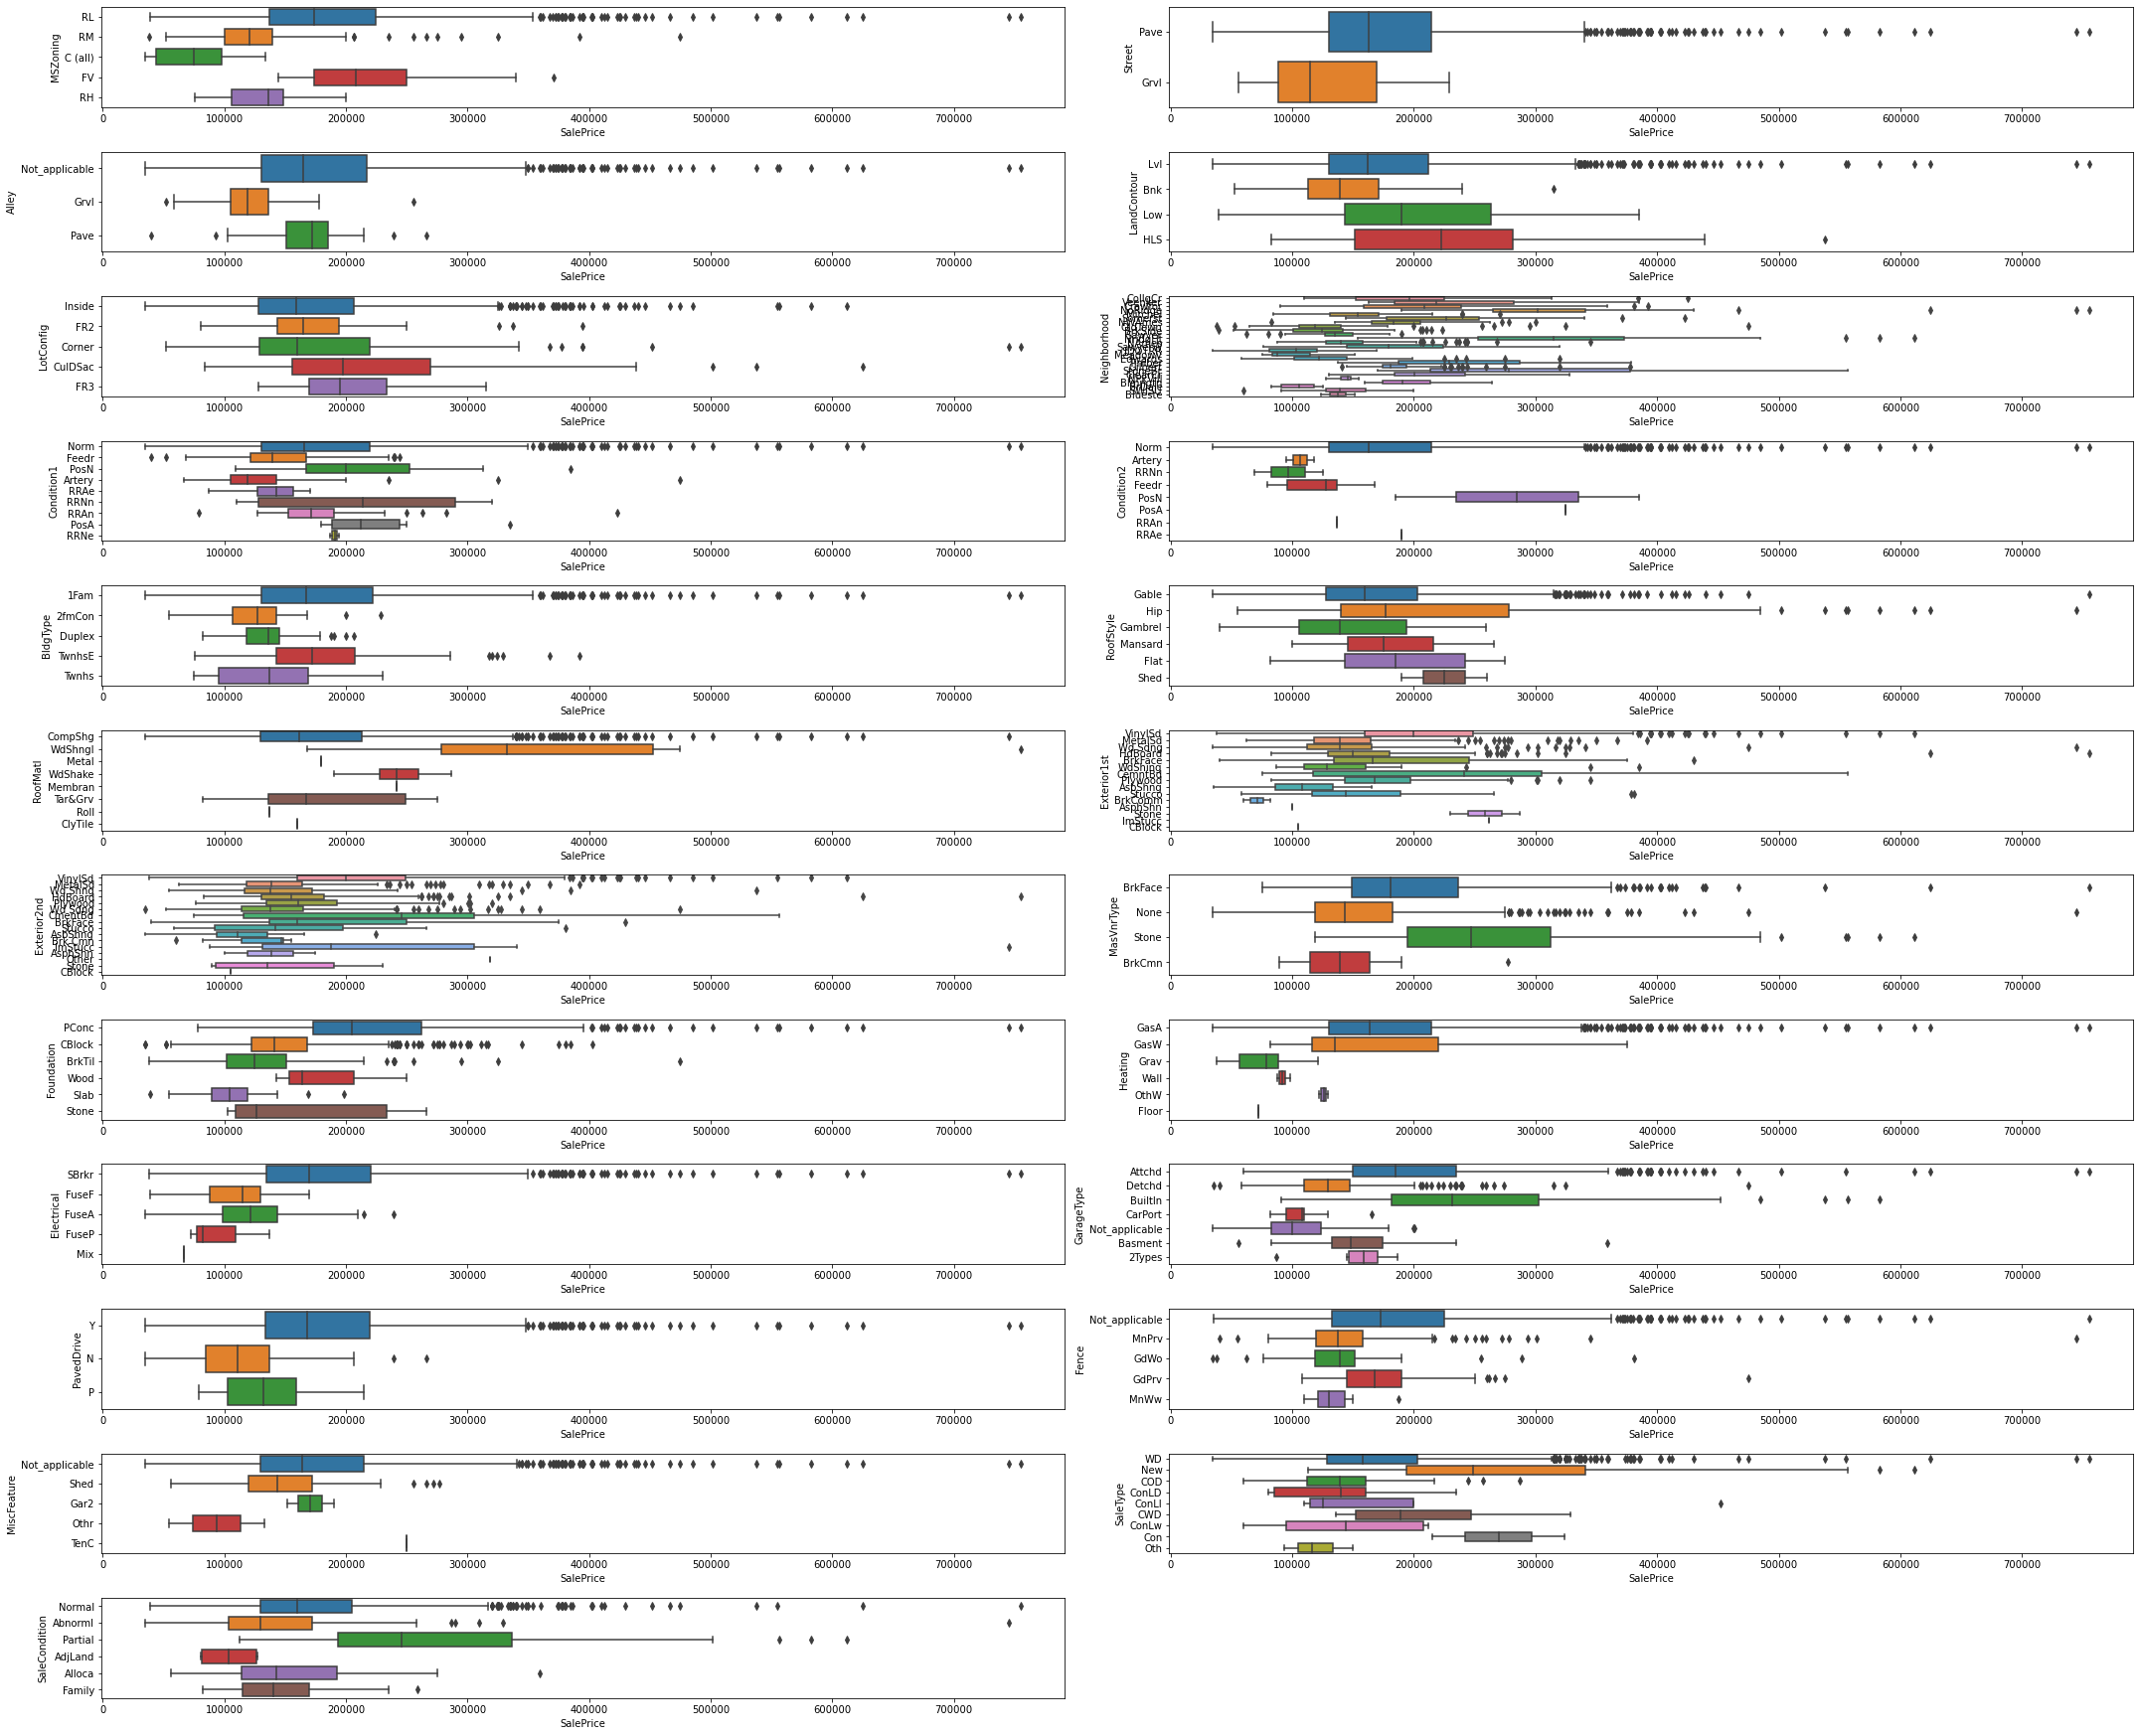

In [39]:
generate_boxplot(unordered_features)

#### Encoding Categorical Variables

In [40]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [41]:
dummy_df.shape

(1451, 144)

- Having 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [42]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [43]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [44]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [45]:
housing_df.shape

(1451, 97)

#### Splitting into Train and Test Data

In [46]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,3,0,3,7,5,18,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600,3,3,0,0,6,8,45,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250,0,3,0,3,7,5,20,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550,0,3,0,3,7,5,106,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260,0,3,0,3,8,5,21,...,0,0,1,0,1,1,0,1,1,0


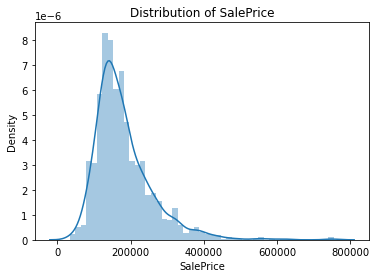

In [47]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

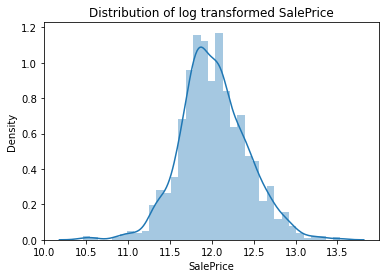

In [48]:
sns.distplot(np.log(housing_df['SalePrice']))   #Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [49]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
X['LotFrontage'].isnull().any()

True

In [52]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='median')
si.fit(X_train[['LotFrontage']])

SimpleImputer(strategy='median')

In [53]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [54]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [55]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [56]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

### Initial Feature Selection with RFE

In [57]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [58]:
# Checking top 50 features

top_50 = top_n_features(50)


Top 50 features : 
['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [87]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [88]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression

In [89]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 5.000000
ridge  Regression with  5.0
R2 score (train) :  0.9097632185615074
R2 score (test) :  0.7595793124183121
RMSE (train) :  0.11763932341735954
RMSE (test) :  0.20963231935992407


Ridge Regression model was able to achieve R2 score of 0.75 on test data i.e. 75% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.2096 on test data, that means the prediction made by the model can off by 0.2096 unit.

### Lasso Regression

In [90]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9083319827765135
R2 score (test) :  0.7676896303243546
RMSE (train) :  0.11856858544523194
RMSE (test) :  0.20606613234093255


Lesso Regression model was able to achieve R2 score of 0.76 on test data i.e. 76% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.2060 on test data, that means the prediction made by the model can off by 0.2060 unit.

In [91]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=5.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=5.0),Lasso (alpha=0.001)
LotFrontage,0.015001,0.014292
LotArea,0.015094,0.014923
LandSlope,0.011080,0.010471
OverallQual,0.079418,0.082240
OverallCond,0.050220,0.050145
YearBuilt,-0.043345,-0.041397
BsmtQual,0.019494,0.023226
BsmtFinSF1,0.049250,0.041122
BsmtFinSF2,0.015009,0.011455
BsmtUnfSF,0.022387,0.013390


In [92]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[298066 213769 135750 115729 144667]


### Final Model
#### Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [93]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
1stFlrSF,0.106358
2ndFlrSF,0.100059
OverallQual,0.082240
OverallCond,0.050145
BsmtFinSF1,0.041122
MSZoning_RL,0.034747
SaleCondition_Partial,0.033759
GarageArea,0.030942
SaleCondition_Normal,0.028178
Fireplaces,0.026009


In [94]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:12] # top 12 featues

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'MSZoning_RL', 'SaleCondition_Partial', 'GarageArea',
       'SaleCondition_Normal', 'Fireplaces', 'Neighborhood_Somerst',
       'BsmtQual'],
      dtype='object')

#### Doubling the optimal value


In [95]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=5.0)'] = ridge_final_model.coef_
model_coefficients['Ridge (alpha=10.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
model_coefficients['Lasso (alpha=0.002)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=5.0),Ridge (alpha=10.0),Lasso (alpha=0.001),Lasso (alpha=0.002)
LotFrontage,0.015001,0.015001,0.014292,0.014292
LotArea,0.015094,0.015094,0.014923,0.014923
LandSlope,0.011080,0.011080,0.010471,0.010471
OverallQual,0.079418,0.079418,0.082240,0.082240
OverallCond,0.050220,0.050220,0.050145,0.050145
YearBuilt,-0.043345,-0.043345,-0.041397,-0.041397
BsmtQual,0.019494,0.019494,0.023226,0.023226
BsmtFinSF1,0.049250,0.049250,0.041122,0.041122
BsmtFinSF2,0.015009,0.015009,0.011455,0.011455
BsmtUnfSF,0.022387,0.022387,0.013390,0.013390


In [74]:
model_coefficients[['Ridge (alpha=10.0)']].sort_values(by='Ridge (alpha=10.0)', ascending=False).index[:]

Index(['2ndFlrSF', '1stFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'MSZoning_RL', 'SaleCondition_Partial', 'SaleCondition_Normal',
       'GarageArea', 'Fireplaces', 'Neighborhood_Somerst', 'Condition1_Norm',
       'BsmtUnfSF', 'MasVnrType_BrkFace', 'MasVnrType_None', 'BsmtQual',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_VinylSd', 'BsmtFullBath',
       'GarageQual', 'Foundation_PConc', 'Exterior2nd_HdBoard', 'HeatingQC',
       'Neighborhood_NridgHt', 'LotArea', 'BsmtFinSF2', 'LotFrontage',
       'MasVnrType_Stone', 'KitchenQual', 'TotRmsAbvGrd', 'GarageType_Attchd',
       'GarageFinish', 'Exterior2nd_Plywood', 'LotConfig_CulDSac',
       'Condition2_Norm', 'Condition1_Feedr', 'GarageType_Not_applicable',
       'LandSlope', 'GarageType_Detchd', 'Street_Pave', 'Neighborhood_NAmes',
       'Exterior1st_Plywood', 'Neighborhood_Edwards', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Functional', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'RoofStyle_Gable', 

In [96]:
model_coefficients[['Lasso (alpha=0.002)']].sort_values(by='Lasso (alpha=0.002)', ascending=False).index[:]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'MSZoning_RL', 'SaleCondition_Partial', 'GarageArea',
       'SaleCondition_Normal', 'Fireplaces', 'Neighborhood_Somerst',
       'BsmtQual', 'Condition1_Norm', 'Foundation_PConc', 'BsmtFullBath',
       'HeatingQC', 'LotArea', 'Neighborhood_NridgHt', 'LotFrontage',
       'KitchenQual', 'BsmtUnfSF', 'LotConfig_CulDSac', 'GarageFinish',
       'BsmtFinSF2', 'TotRmsAbvGrd', 'Condition2_Norm', 'LandSlope',
       'Street_Pave', 'Condition1_Feedr', 'GarageQual', 'GarageType_Attchd',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_VinylSd', 'GarageType_Detchd',
       'Exterior2nd_Plywood', 'MasVnrType_Stone', 'GarageType_Not_applicable',
       'MasVnrType_BrkFace', 'Exterior1st_VinylSd', 'MasVnrType_None',
       'Exterior2nd_HdBoard', 'Exterior1st_Plywood', 'Neighborhood_NAmes',
       'Exterior1st_HdBoard', 'RoofStyle_Hip', 'Exterior1st_Wd Sdng',
       'Neighborhood_Edwards', 'RoofStyle_Gable', 'Functional', 

##### Drop top 5 important features

In [97]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1'], axis=1)

In [98]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1'], axis=1)

In [99]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [100]:
lasso_model.coef_

array([ 0.02141882,  0.02382925,  0.01122435, -0.01751613,  0.06424611,
        0.00630359, -0.00057925,  0.03356436,  0.02786631,  0.05951397,
        0.10256062, -0.02744301,  0.05431019,  0.0177352 ,  0.06727812,
        0.02794042,  0.03697772,  0.01932865,  0.01555207, -0.02105035,
       -0.01505562,  0.01289021,  0.02630204,  0.00250523,  0.01854151,
        0.00463135, -0.04784668, -0.02984656, -0.03553147, -0.01218096,
       -0.03197167, -0.03947232,  0.02313674,  0.01346095,  0.01952961,
        0.03768621,  0.03640974,  0.02558742,  0.02414671,  0.01840203,
        0.0205325 ,  0.00211923,  0.02597366,  0.03317338,  0.03034037])

In [103]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
TotRmsAbvGrd,0.102561
GarageArea,0.067278
BsmtQual,0.064246
KitchenQual,0.059514
Fireplaces,0.054310
